# <span style="color:darkblue"> Lecture 20: Text Analysis </span>

<font size = "5">

Intro text analysis

https://www.youtube.com/watch?v=IRKDrrzh4dE

# <span style="color:darkblue"> I. Setup Working Environment </span>

In [36]:

# Import SK-Learn library for machine learning functions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Kmenas
from sklearn.cluster import MiniBatchKMeans

import faiss


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

We will analyze a dataset on Amazon Reviews

https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset/data


In [8]:
data = pd.read_csv("data_raw/amazon_reviews.csv")

len(data)


1597

<font size = "5">

Check features

In [3]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

<font size = "5">

Check text

In [15]:
reviews = data["reviews.text"]
reviews

0       I initially had trouble deciding between the p...
1       Allow me to preface this with a little history...
2       I am enjoying it so far. Great for reading. Ha...
3       I bought one of the first Paperwhites and have...
4       I have to say upfront - I don't like coroporat...
                              ...                        
1592    This is not the same remote that I got for my ...
1593    I have had to change the batteries in this rem...
1594    Remote did not activate, nor did it connect to...
1595    It does the job but is super over priced. I fe...
1596    I ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

<font size = "5">

Check rating

In [ ]:
plt.hist(x = data["reviews.rating"])


<font size = "5">

Filter non-missing ratings data

- 26% missing data!
- Could generate selection bias in reviews

In [23]:
# Check for missing values
# A lot of reviews are missing review data
missing_values = data["reviews.rating"].isnull().sum()
percent_missing = missing_values /len(data)
print(percent_missing)

# Extract non-missing data
data_nonmissing = data[data["reviews.rating"].notnull()]

0.2629931120851597


# <span style="color:darkblue"> III. Bag of Words </span>


<font size = "5">

Stop words

- Commonly used words
- Available for different languages



In [5]:
# First ten English stop words
list(ENGLISH_STOP_WORDS)[0:10]

['together',
 'above',
 'many',
 'whom',
 'indeed',
 'these',
 'describe',
 'it',
 'cry',
 'not']

<font size = "5">

Create custom stop words

In [27]:
# Here we added Python to the list of stop words
custom_stop_words = list(ENGLISH_STOP_WORDS) + ["Python"]

# You can also create your own list
# custom_stop_words = ["and","or","how"]

<font size = "5">

Count vectorizer

- Check for distinct words across all reviews
- Remove any stop words
- ```min_df``` is used to filter out words depending <br>
on how often they occur. For example, ```min_df=3``` <br>
only keeps words if they are mentioned at least 3 times

In [14]:
word_model = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model.fit(reviews)

CountVectorizer(stop_words=['except', 'been', 'about', 'my', 'whereupon',
                            'from', 'throughout', 'cannot', 'full', 'indeed',
                            'down', 'six', 'someone', 'thereby', 'only', 'or',
                            'here', 'now', 'both', 'yours', 'please', 'perhaps',
                            'too', 'thereafter', 'much', 'has', 'are',
                            'becomes', 'hers', 'being', ...])

<font size = "5">

Check Vocabulary

- Check in VS-Code Data Viewer
- You can use preliminary findings to decide whether <br>
to add more stop words

In [ ]:
# Extract words in vocabulary and frequency
vocabulary = word_model.vocabulary_

# Convert to dataframew
frequency_words  = pd.DataFrame(vocabulary.items(),
                                columns=['Word', 'Frequency'])
                                
# Display sorted dataset                                
frequency_words.sort_values(by = "Frequency",ascending=False)

<font size = "5">

Create a dataset counting which words are used <br>
per review

- Each row is a different review
- Each column is a ${0,1}$ indicator on whether that <br>
word was mentioned
- Huge matrix!!

In [29]:
# Create X matrix
X = word_model.transform(reviews)

# Check dimension of X matrix
np.shape(X)

(1597, 1292)

<font size = "5">

Try it yourself!

Create a bag of words for the column "review.title".

- What are the most common words?



In [34]:
data["reviews.userCity"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1592   NaN
1593   NaN
1594   NaN
1595   NaN
1596   NaN
Name: reviews.userCity, Length: 1597, dtype: float64

In [35]:
reviews1= data["reviews.title"]
reviews1=reviews1.fillna("")
reviews1

0                          Paperwhite voyage, no regrets!
1                       One Simply Could Not Ask For More
2              Great for those that just want an e-reader
3                                Love / Hate relationship
4                                               I LOVE IT
                              ...                        
1592    I would be disappointed with myself if i produ...
1593                          Battery draining remote!!!!
1594        replacing an even worse remote. Waste of time
1595                                           Overpriced
1596    I am sending all of this crap back to amazon a...
Name: reviews.title, Length: 1597, dtype: object

In [20]:
word_model1= CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model1.fit(reviews1)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


CountVectorizer(stop_words=['except', 'been', 'about', 'my', 'whereupon',
                            'from', 'throughout', 'cannot', 'full', 'indeed',
                            'down', 'six', 'someone', 'thereby', 'only', 'or',
                            'here', 'now', 'both', 'yours', 'please', 'perhaps',
                            'too', 'thereafter', 'much', 'has', 'are',
                            'becomes', 'hers', 'being', ...])

In [21]:
# Write your own code


# Extract words in vocabulary and frequency
vocabulary1 = word_model1.vocabulary_

# Convert to dataframew
frequency_words1  = pd.DataFrame(vocabulary1.items(),
                                columns=['Word', 'Frequency'])
                                
# Display sorted dataset                                
frequency_words1.sort_values(by = "Frequency",ascending=False)


,Word,Frequency
1146,zero,1291
795,young,1290
17,yes,1289
343,yeehaw,1288
313,years,1287
...,...,...
815,042,4
818,040,3
469,04,2
840,030,1


# <span style="color:darkblue"> IV. Sentiment Analysis </span>

<font size = "5">
Sentiment analsys uses words to predict user ratings. <br>


- In this case we have ratings labels
- We'll use the data with nonmissing labels


In [24]:
# Write your own code

text = data_nonmissing["reviews.text"]
y    = data_nonmissing["reviews.rating"]

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                    random_state=0)

<font size = "5">

Extract vectorized X

In [28]:
# Create X matrix
word_model_train = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model_train.fit(text_train)
X_train = word_model.transform(text_train)

# Check dimension of X matrix
np.shape(X_train)

(882, 1292)

<font size = "5">

We can compress the data using <br>
truncated singular value decomposition (SVD)

- This is an alternative to PCA that is better suited <br>
for sparse, binary data like text

In [30]:
svd = TruncatedSVD(n_components=3,random_state=42);
svd.fit(X_train)
X_svd_train = svd.transform(X_train)
np.shape(X_svd_train)

(882, 3)

[Text(0.5, 0, 'First Principal Component'),
 Text(0, 0.5, 'Second Principal Component')]

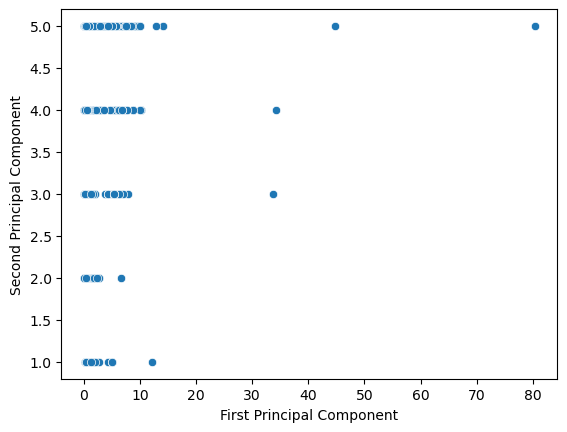

In [31]:
# Hue is used to color
ax = sns.scatterplot(x = X_svd_train[:,0],
                     y = y_train)
ax.set(xlabel='First Principal Component',
       ylabel='Second Principal Component')


<font size = "5">

Try it yourself!

Create a machine learning pipeline

- Run a support vector machine regression to predict user ratings
- What is the out-of-sample performance on the test data?
- Use your data to predict reviews that were missing
- How does the distribution of missing to non-missing reviews compare?



In [40]:

# Write your own code

# Create the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=custom_stop_words)),
    ('svd', TruncatedSVD(n_components=3, random_state=42)),
    ('regressor', SVR())
])

# Fit the pipeline on the training data
# Convert the numpy array to a list
text_train_list = text_train.tolist()

# Fit the pipeline on the training data
word_model_train.fit(text_train_list)
X_train = word_model_train.transform(text_train_list)
missing_count = len(data[data["reviews.rating"].isnull()])
non_missing_count = len(data[data["reviews.rating"].notnull()])
print("Missing reviews count:", missing_count)
print("Non-missing reviews count:", non_missing_count)
print("Missing to non-missing ratio:", missing_count / non_missing_count)




Missing reviews count: 420
Non-missing reviews count: 1177
Missing to non-missing ratio: 0.356839422259983


<font size = "5">

Try it yourself!

- What happens if you change the minimum frequency of words <br>
and/or change the number of components?

In [ ]:
# Write your own code



